# PC lab 10: Artificial Neural Networks
---

<img src="img/neural_nets_art.jpg">

## Introduction

Although artificial neural networks enjoy a lot of progress today, they were first described by [Warren McCulloch and Walter Pitts](https://link.springer.com/article/10.1007%2FBF02478259) in 1943. Early progress in training competitive neural networks was stalled by a multitude of reasons, such as the limited computer resources, sub-optimal network architectures and the use of smaller datasets. In this PC-lab we will implement a custom neural network on a step-by-step basis, allowing an in-depth comprehension of the essential elements of deep learning


### Artificial Neuron

The core unit of every (artificial) neural network is considered the neuron. The neuron can be observed as a switch. It receives **one or more inputs** $\mathbf{x}$, processes a **weighted sum** $z$ (adding **bias** $b$) that is sent through the **sigmoid activation function $\sigma()$**, outputing a **single response**  $a$:

$$ 
z = \sum\limits_{i=1}^{n}(w_ix_i) + b = \sum\limits_{i=0}^{n}(w_ix_i)$$ with $$ x_0 = 1 \tag{1}\\
$$

$$ a = \sigma(z) $$

<img src="img/neuron_bishop.jpg" style="width:40%">

The default recommended activation function is the **Rectified Linear Unit**, or **ReLU**. 

$$ ReLU(z) = max\{0,z\} $$

<img src="img/relu.png" style="width:30%">

The ReLU function has many properties that make optimization easy using gradient-based methods. It can be seen as a switch giving no response for $z < 0$ and giving a response $z$ for $z > 0$.



### Artificial Neural Networks

The most basic artificial neural network is the **feedforward neural network**. There are no feedback connections such as can be found in **recurrent neural networks**. A feedforward neural network is called a network as it is composed out of many inheriting functions making up the model, e.g. $f(\textbf{x})= f^{(3)}(f^{(2)}(f^{(1)}(\textbf{x})))$. Neural networks typically are constructed in different layers of neurons in which every neuron is connected with all the neurons of the previous layer, eventually resulting in a set of **output neurons** $\mathbf{\hat{\textbf{y}}}$.

<img src="img/nn_bishop_adapted.png" style="width:70%">


To train the network, samples are processed in batches. This allows for faster training and improved convergence of the loss during gradient descent. Advantages of stochastic gradient descent or other optimization algorithms for loss calculation are not discussed in this PC-lab, but have been [extensively discussed](https://ruder.io/optimizing-gradient-descent/) before.
Practically, the first fully-connected layer of the network using batch size $B$ is computed by matrix combination of the input $X \in \mathbb{R}^{B, D}$ with a set of weights $W^{(12)} \in \mathbb{R}^{D, M}$.

\begin{equation}
XW^{(12)} =
\begin{bmatrix}
1 & x_{0,1} & ...  & x_{0,D-1} & x_{0,D} \\
1 & x_{1,1} & ... & x_{1,D-1} & x_{1,D} \\
... & ... & ... & ... & ...\\
1 & x_{B-1,1} & ... & x_{B-1,D-1} & x_{B-1,D} \\
1 & x_{B,1} & ...  & x_{B,D-1} & x_{B,D} \\
\end{bmatrix}
\begin{bmatrix}
W_{0,0} & W_{0,1} & ...  & W_{0,M-1} & W_{0,M} \\
W_{1,0} & W_{1,1} & ... & W_{1,M-1} & W_{1,M} \\
... & ... & ... & ... & ...\\
W_{D-1,0} & W_{D-1,1} & ... & W_{D-1,M-1} & W_{D-1,M} \\
W_{D,0} & W_{D,1} & ...  & W_{D,M-1} & W_{D,M} \\
\end{bmatrix}
\end{equation}

<div class="alert alert-warning">
    <h2>Structure of the exercise</h2>
    <p>The idea of this PC-Lab will be to construct our very own neural network from scratch. Every exercize will introduce a new feature necessary to train a working model.</p>
    <p>We define the class <code>Neural_Network</code> for which the structural architecture is given at initialization. Let's start by creating a neural network with one hidden layer. To include the bias term, we add a scalar to the weights vector for every layer.</p> 
    
<code>
    class Neural_Network(object):
    def __init__(self, input_nodes, output_nodes, hlayer_nodes):
        self.input_nodes = input_nodes
        self.output_nodes = output_nodes
        self.hlayer_nodes = hlayer_nodes
        # initialize weights + bias in the first layer
        self.W_12 = np.random.randn(self.input_nodes+1, self.hlayer_nodes)) 
        # initialize weights + bias in the second layer
        self.W_23 = append(np.random.randn(self.hlayer_nodes+1, self.output_nodes))
</code>



</div>

<div class="alert alert-success">

<h3>EXERCISE</h3> <p><b>Complete</b> the attribute function <code>Neural_Net.forward()</code> and <code>Neural_Net.relu()</code></p>
</div>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data| (batch_size, input_nodes) |
|y|$$y$$|label| (batch_size, output_nodes) |
|y_hat| $$\hat{y}$$| Output Data | (batch_size, output_nodes) |
|W_12 | $$W^{(12)}$$ | Layer 1 weights | (input_nodes + 1, hlayer_nodes) |
|W_23 | $$W^{(23)}$$ | Layer 2 weights | (hlayer_nodes + 1, output_nodes) |
|a_1 | $$a^{(1)}$$ | Layer 1 activity (inputs) | (batch_size, input_nodes + 1) |
|z_2 | $$z^{(2)}$$ | Layer 2 linear combination | (batch_size, hlayer_nodes) |
|a_2 | $$a^{(2)}$$ | Layer 2 activity | (batch_size, hlayer_nodes + 1) |
| y_hat | $\hat{y}$ | Layer 3 linear combination | (batch_size, output_nodes) |

$$
\textbf{z}^{(2)} = \textbf{a}^{(1)}\textbf{W}^{(12)}  \tag{2}\\
$$
$$
\textbf{a}^{(2)} = ReLU(\textbf{z}^{(2)}) \tag{3}\\
$$
$$
\hat{\textbf{y}} = \textbf{a}^{(2)}\textbf{W}^{(23)} \tag{4}\\
$$


In [93]:
import numpy as np

In [94]:
class Neural_Network(object):
    def __init__(self, input_nodes, output_nodes, hlayer_nodes):
        self.input_nodes = input_nodes
        self.output_nodes = output_nodes
        self.hlayer_nodes = hlayer_nodes
        
        # initialize weights + bias in the first layer
        self.W_12 = np.random.randn(self.input_nodes+1, self.hlayer_nodes)
        # initialize weights + bias in the second layer
        self.W_23 = np.random.randn(self.hlayer_nodes+1, self.output_nodes)

    def forward(self, X):
        # add bias to input samples
        self.a_1 = np.hstack((np.ones((len(X),1)), X))
        
        self.z_2 = """..."""
        self.a_2 = """..."""
        self.y_hat = """..."""
        
        
        return np.clip(self.y_hat, -10e6, 10e6)
    
    def relu(self, z):
        """..."""


In [112]:
np.random.seed(1)
# Initialize neural network with 1 input, 1 output and 2 nodes in hidden layer
NN = Neural_Network(1,1,3)
# Input two samples, each with one input
NN.forward([[2],[3]])

array([[2.10183529],
       [2.37793415]])

## Backpropagation

Let's construct a dataset that follows the function $\mathbf{y = sin(x)}$. To train the neural network we have to evaluate how the prediction $\hat{y}$ compares to the true label $y$. This is done through the loss function $L$. The formula used for L is dependent upon the problem we are trying to solve. In line with previous methods fitting a **regression** problem, we consider the **MSE** :

$$
L = \frac{1}{n}\sum_{i=1}^{n}{(y_i-\hat{y_i})^2}\tag{6}
$$ 

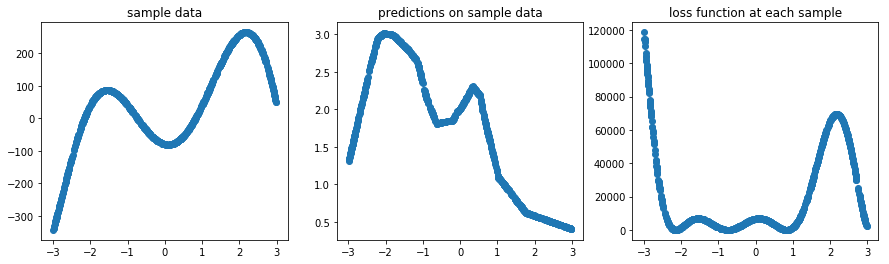

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

def squared_error(y, y_hat):
    return (y-y_hat)**2

X = np.random.uniform(-3, 3, size=(1000,1)) # sample random points for x=[0, pi]
y = -26*X + 145*X**2 + 28*X**3 - 26*X**4 - 2*X**5 + X**6 - 80
#y = np.sum(np.sin(X),axis=1).reshape(-1,1) # sinus transform
NN = Neural_Network(1,1,40)
y_hat = NN.forward(X) # predict values
loss = squared_error(y, y_hat)

fig, (ax_1, ax_2, ax_3) = plt.subplots(1,3, figsize=(15,4))
ax_1.set_title("sample data")
ax_1.scatter(X, y)
ax_2.set_title("predictions on sample data")
ax_2.scatter(X, y_hat)
ax_3.set_title("loss function at each sample")
ax_3.scatter(X, loss)

To train our model, we must find a set of weights that minimizes the overall loss function. An exhaustive method would be to try all possible combinations of weights, a solution that blows up with increasing dimensionality. In order to reduce processing times to obtain the optimal set of weights, we evaluate the influence of each weight on the loss function. If we consider the different equations to obtain our loss: 

$$
\textbf{z}^{(2)} = \textbf{a}^{(1)}\textbf{W}^{(12)} \tag{2}\\
$$
$$
\textbf{a}^{(2)} = ReLU(\textbf{z}^{(2)}) \tag{3}\\
$$
$$
\hat{\textbf{y}} = \textbf{a}^{(2)}\textbf{W}^{(23)} \tag{4}\\
$$
$$
L = \frac{1}{n} \sum_{i=0}^{n}{(y_{i}-\hat{y_{i}})^2} \tag{6}\\
$$

To evaluate the influence of $W^{(23)}$ on the loss $L$, we can find the **partial derivative** of the loss in function of $W^{(23)}$. Using the **chain rule**, this can be calculated using a step-by-step approach.
$$ \frac{\delta L}{\delta W^{(23)}} = \frac{\delta \textbf{L}}{\delta \hat{\textbf{y}}} \cdot \frac{\delta \hat{\textbf{y}}}{\delta \textbf{W}^{(23)}} = \delta_{1} \cdot \frac{\delta \hat{\textbf{y}}}{\delta \textbf{W}^{(23)}}  \tag{7}$$




Backpropagation is the step-by-step evaluation of the partial derivatives of the loss in function of the network weights, performed by backward iteration over the different transformations performed by the network. The values obtained when iterating down from the loss function are recyclable when calculating the derivative of weights further down in the chain rule, making **a substantial difference** in the amount of processing power needed to obtain all derivatives. The use of backpropagation is a major element in making training of deep neural networks possible. For example, to obtain the derivatives of the weights in the first layer ($\textbf{W}^{(12)}$) we apply:

$$ \frac{\delta L}{\delta W^{(12)}} = \delta_{1} \cdot \frac{\delta \hat{\textbf{y}}}{\delta \textbf{a}^{(2)}} \cdot \frac{\delta \textbf{a}^{(2)}}{\delta \textbf{z}^{(2)}} \cdot \frac{\delta \textbf{z}^{(2)}}{\delta \textbf{W}^{(12)}} = \delta_{2} \cdot \frac{\delta \textbf{z}^{(2)}}{\delta \textbf{W}^{(12)}} \tag{8} $$


$\delta_{1}$ and $\delta_{2}$ are solely introduced as variables to which the intermediate values can be assigned. Using these variables when implementing backpropagation into the neural network will make things easier. 


<div class="alert alert-success">

<b>EXERCISE:</b> 
<p><b>Write out</b> the following partial derivatives as found in the chain rule.</p>

$$\frac{\delta L}{\delta \hat{y}}$$
<hr>
$$\frac{\delta \hat{y}}{\delta W^{(23)}}$$
<hr>
$$\frac{\delta \hat{y}}{\delta a^{(2)}}$$
<hr>
$$\frac{\delta a^{(2)}}{\delta z^{(2)}}$$
<hr>
$$\frac{\delta z^{(2)}}{\delta W^{(12)}}$$

</div>

<hr>
<div class="alert alert-success">

<h3>EXERCISE</h3>
<p><b>Complete</b> the attribute functions <code>NN.backpropagate()</code> and <code>NN.relu_prime()</code>, and the function <code>loss_prime</code>. Use the partial derivatives of the previous exercise to get an overview of the sequential steps executed in backpropagation.</p>
</div>
</div>

In [105]:
# Replace with solution of NN here

class Neural_Network(object):
    def __init__(self, input_nodes, output_nodes, hlayer_nodes):
        self.input_nodes = input_nodes
        self.output_nodes = output_nodes
        self.hlayer_nodes = hlayer_nodes
        
        # initialize weights + bias in the first layer
        self.W_12 = np.random.randn(self.input_nodes+1, self.hlayer_nodes)
        # initialize weights + bias in the second layer
        self.W_23 = np.random.randn(self.hlayer_nodes+1, self.output_nodes)

    def forward(self, X):
        # add bias to input samples
        self.a_1 = np.hstack((np.ones((len(X),1)), X))
        
        """..."""
        
        return np.clip(self.y_hat, -10e6, 10e6)
    
    def relu(self, z):
        
        """..."""

    def relu_prime(self, z):

        """..."""

    def backpropagate(self, X, y, get_loss_prime):
        self.y_hat = """..."""
        
        self.delta_1 = """..."""
        self.dLdW_23 = """..."""
        self.dLda_2 = """..."""
        self.delta_2 = """..."""
        self.dLdW_12 = """..."""

        # join two flattened arrays in one vector
        return np.concatenate((self.dLdW_12.ravel(), self.dLdW_23.ravel())) 
    

In [104]:
def get_loss_prime(y_hat, y): 
    """...""" # Cost function over all batches, divided by # batches

np.random.seed(1)
NN = Neural_Network(1,1,2)
NN.backpropagate(X[:2], y[:2], get_loss_prime)

> <ipython-input-101-460f4000b56d>(36)backpropagate()
-> self.y_hat = self.forward(X)
(Pdb) c


array([  387.7926547 , -1248.30602047, -1414.45232628,  3539.78947657,
         448.10403971,  1591.13799986,  1318.43267606])

<div class="alert alert-success">

<b>EXERCISE:</b> 
<p><b>Evaluate</b> the values and shapes of <i>dLdW_12</i> and <i>dLdW_23</i> separately, and compare the size of vectors. Can you differentiate the updates for weights from the updates for the biases? Can you predict the shapes of these values after changing the amount of nodes of the different layers within the neural network? Don't forget to run <code>NN.backpropagation()</code> with updated arguments when changing the hyperparameters of the network!</p>
</div>


In [111]:
NN = Neural_Network(1,1,2)
NN.backpropagate([[1],[2]], [[np.sin(1)],[np.sin(2)]], get_loss_prime)
print("dLdW_12:\n {}".format(NN.dLdW_12))
print("dLdW_23:\n {}".format(NN.dLdW_23))


dCdW_12:
 [[0. 0.]
 [0. 0.]]
dCdW_23:
 [[-3.55219522]
 [ 0.        ]
 [ 0.        ]]


## Gradient Descent

Our simple neural network is close to completion now. One more important element is the ability to train this network. To adjust the weights based on the partial derivatives we need to apply the obtained gradient to perform an update to the actual weights. As we are dealing with a **non-convex** and **non-linear optimization problem**, updates are performed using the well-known **gradient descent** algorithm. Small variations on the gradient descent method have shown to drastically increase the speed at which deep neural networks can be trained (i.e. [momentum, adam, ...](http://ruder.io/optimizing-gradient-descent/index.html)).

### A brief recap: Gradient Descent



$$W_{t+1} = W_{t} - \eta \nabla L(\theta)$$


where

$\eta$: learning rate (default: 1e-4)



>**input** starting point $\textbf{x}\in$ **dom** $f$.
>
>**repeat** 
>
>>    1. $\Delta \textbf{x} := -\nabla f(\textbf{x})$.
>>    3. *Update*. $\textbf{x}:=\textbf{x}+\eta\Delta \textbf{x}$.
>
>**until** stopping criterion is satisfied.

>**output** $x$

The stopping criterion is usually expressed as the amount of times the dataset is iterated. An **epoch** is one iteration over the whole dataset.

In [74]:
from sklearn.utils import shuffle

In [136]:
# Replace with solution of NN here

class Neural_Network(object):
    def __init__(self, input_nodes, output_nodes, hlayer_nodes):
        self.input_nodes = input_nodes
        self.output_nodes = output_nodes
        self.hlayer_nodes = hlayer_nodes
        
        # initialize weights + bias in the first layer
        self.W_12 = np.random.randn(self.input_nodes+1, self.hlayer_nodes)
        # initialize weights + bias in the second layer
        self.W_23 = np.random.randn(self.hlayer_nodes+1, self.output_nodes)

    def forward(self, X):
        # add bias to input samples
        self.a_1 = np.hstack((np.ones((len(X),1)), X))
        
        """..."""
        
        return np.clip(self.y_hat, -10e6, 10e6)
    
    def relu(self, z):
        
        """..."""

    def relu_prime(self, z):

        """..."""

    def backpropagate(self, X, y, get_loss_prime):
        self.y_hat = """..."""
        
        self.dLdW_23 = """..."""
        self.dLda_2 = """..."""
        self.delta_2 = """..."""
        self.dLdW_12 = """..."""

        # join two flattened arrays in one vector
        return np.concatenate((self.dLdW_12.ravel(), self.dLdW_23.ravel())) 
    
    def set_weights(self, weights):
        self.W_12 = weights[:len(self.W_12.ravel())].reshape(self.W_12.shape)
        self.W_23 = weights[len(self.W_12.ravel()):].reshape(self.W_23.shape)
    
    def get_weights(self):
        return np.concatenate((self.W_12.ravel(), self.W_23.ravel()))
    
    def compile(self, optimizer_f, loss_f, loss_prime_f):
        self.optimizer =  optimizer_f
        self.get_loss = loss_f
        self.get_loss_prime = loss_prime_f
        
    def fit(self, X, y, batch_size=8, epochs=50, eta=1e-5):
        epoch = 0   # set starting epoch
        pool = np.arange(len(X)//batch_size)   # setup batch pool
        avg_loss_all = []   # initialize loss vector
        while epoch<epochs:
            print("\repoch: {}".format(epoch), end="")
            epoch +=1
            # shuffle X, y
            X_scrambled, y_scrambled = shuffle(X,y) 
            avg_loss = 0
            for i in shuffle(pool):   # select random batch
                # select batch data
                X_batch = X_scrambled[i*batch_size:(i+1)*batch_size]   
                y_batch = y_scrambled[i*batch_size:(i+1)*batch_size]
                # get prediction
                y_hat = self.forward(X_batch)
                # get loss on prediction
                avg_loss += self.get_loss(y_hat, y_batch)
                # get gradients on weights
                dLdW = self.backpropagate(X_batch, y_batch, self.get_loss_prime)
                # get update values with weight gradients
                dLdW_update = self.optimizer(dLdW, eta)
                self.set_weights(self.get_weights()+dLdW_update)   # set new weights with update values
            avg_loss_all.append(avg_loss)
            
        return avg_loss_all

<div class="alert alert-success">

<h3>EXERCISE</h3> 
    <p><b>Complete</b> the function <code>gradient_descent()</code>. The different steps as explained above have already been partially implemented in the <code>Neural_Network.fit()</code> function, make sure to analyze it before completing the code for the <code>gradient_descent</code> function. <code>gradient_descent</code> is one way to optimize your weights given a loss, and is stored in <code>Neural_Network.optimizer</code> when running <code>Neural_Network.compile()</code></p>
</div>

In [137]:
def MSE_loss(y_hat, y):
    return """..."""

def MSE_loss_prime(y_hat, y):
    return """..."""

def gradient_descent(dLdW, eta):
    return """..."""

<div class="alert alert-success">

<h3>EXERCISE</h3> 
    <p><b>Run</b> the code below and <b>evaluate</b> how the network trains when tweaking with specific functions such as the amount of hidden nodes, epochs and step size of the gradient update.</p>
</div>

In [ ]:
np.random.seed(1)
NN = Neural_Network(1,1,320)
NN.compile(gradient_descent, MSE_loss, MSE_loss_prime)

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax_1, ax_2, ax_3, ax_4 = ax.ravel()
ax_1.scatter(X , NN.forward(X))
ax_1.set_title("Predicted y values BEFORE GD")
loss = NN.fit(X, y, epochs=200, batch_size=5, eta=1e-5)
ax_2.scatter(X, NN.forward(X))
ax_2.set_title("Predicted y values AFTER GD")
ax_3.scatter(X,y)
ax_3.set_title("True y values")
ax_4.set_title("Loss function throughout training")
ax_4.plot(range(len(loss)),loss, 'r')


<div class="alert alert-success">

<h3>Optional EXERCISE</h3> 
    <p>Tweak the network to allow for classification purposes. For this, a sigmoid layer has to be added as the final step in
    <code>NN.forward()</code>. Make sure to adjust the backpropagate step and the loss function accordingly.</p>
</div>